# Лабораторна робота №3
# Злиття датафреймів, агрегування даних та візуалізація даних

Виконав: студент групи КН-221в Овчаренко Максим  
Перевірив: асистент кафедри Герман Олександрович Звєрцев

Завдання:

В цій лабораторній роботі потрібно використовувати методи Pandas для злиття та агрегування, використовувати атрибути loc, iloc та слайсинг.
НЕ використовувати спискові включення та інші методи ітерування всередині структур даних (для завдань 1-14)

# Завдання 1
Загрузити файл з даними про споживання енергії “En_In.xls”, який являє 
собою перелік показників енергозабезпечення та виробництва відновлювано 
електроенергії, і ввести їх в DataFrame.
Майте на увазі, що це файл Excel, а не .csv. Також необхідно НЕ
ВКЛЮЧАТИ інформацію з нижніх та верхніх рядків файлу даних. Перші два
сто пці непотрібні, тому їх необхідно виключити із датафрейму, а  акож
поміняти мітки стовпців так, щоб вони були такими:

In [9]:
import numpy as np
import openpyxl
import pandas as pd
import re


data1 = pd.read_excel('En_In.xls', skiprows=range(1, 18), skipfooter=38, usecols="C:F")
data1.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
data1.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


# Завдання 2
Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж = 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з "....."), переконайтеся, що це відображається як значення np.NaN.

In [10]:
data1['Energy Supply'] = data1['Energy Supply'].replace('.....', np.NaN)
data1['Energy Supply'] = data1['Energy Supply'] * 1000000
data1.head(5)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,.................................................,...,0.641026
4,Andorra,9000000,121,88.695650


# Завдання 3
Перейменуйте наступний список країн:
"Republic of Korea": "South Korea",
"United States of America": "United States", "
United Kingdom of Great Britain and Northern Ireland": "United
Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

In [11]:
country_mapping = {
    r"(.*United States of America.*)": "United States",
    r"(.*United Kingdom of Great Britain and Northern Ireland.*)": "United Kingdom",
    r"(.*China, Hong Kong Special Administrative Region.*)": "Hong Kong",
    r"(^(?!.*Democratic People's).*Republic of Korea.*)": "South Korea"
}
data1['Country'] = data1['Country'].replace(country_mapping, regex=True)
renamed_countries = data1[data1['Country'].isin(country_mapping.values())]
renamed_countries

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,585000000,82,0.000000
164,South Korea,11007000000,221,2.279353
214,United Kingdom,7920000000,124,10.600470
216,United States,90838000000,286,11.570980


# Завдання 4
Існує також декілька країн, що мають в назві цифри та/або дужки.
Обов’язково видаліть їх, напр. 'Bolivia (Plurinational State of) 
повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [12]:
def clean_country_names(country):
    clean_name = re.sub(r' \(.+\)|\d+', '', country).strip()
    return clean_name
data1['Country'] = data1['Country'].apply(clean_country_names)

# Тест завдань 1-4

In [91]:
data1.loc[data1['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,.................................................,...,0.64
24,Bolivia,336000000,32,31.48
164,South Korea,11007000000,221,2.28


# Завдання 5
Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані Світового банку про ВВП країн від 1960 до 2015 року.
Обов’язково не включайте заголовок до датафрейму і перейменуйте наступний список країн:
"Korea, Rep.": "South Korea",
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

In [13]:
data2 = pd.read_csv('gpd.csv', skiprows=4)
country_mapping = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
data2['Country Name'] = data2['Country Name'].replace(country_mapping)
data2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,7.707081e+10,8.003449e+10,8.497844e+10,9.124438e+10,9.848904e+10,1.072507e+11,...,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


# Завдання 6
Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі 
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.

In [15]:

data3 = pd.read_excel('scimagojr.xlsx')
data3

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


# Дата сет 1

In [16]:
data1

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,.................................................,...,0.641026
4,Andorra,9000000,121,88.695650
...,...,...,...,...
222,Viet Nam,2554000000,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344000000,13,0.000000
225,Zambia,400000000,26,99.714670


# Дата сет 2

In [17]:
data2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",YEM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.672565e+10,2.761787e+10,2.872656e+10,2.991436e+10,3.090675e+10,2.624342e+10,2.689160e+10,2.800914e+10,NaN,NaN
260,South Africa,ZAF,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,7.707081e+10,8.003449e+10,8.497844e+10,9.124438e+10,9.848904e+10,1.072507e+11,...,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10


# Дата сет 3

In [18]:
data3

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


# Завдання 7
Приєднайте три набори даних із завдань 1-6 до нового набору даних (використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
бути ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '%
Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
'2015'].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [19]:
top15 = data3.head(15)

gdp = data2[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
gdp.set_index('Country Name', inplace=True)

energy = data1[['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']]
energy.set_index('Country', inplace=True)

merged = top15.merge(gdp, how='inner', left_on='Country', right_index=True).merge(energy, how='inner', left_on='Country', right_index=True)

merged.reset_index(inplace=True)

merged = merged[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                 '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
merged

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,1,127050,126767,597237,411683,4.70,138,127191000000,93,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
1,United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
2,Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
3,United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
4,Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
5,Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
6,Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
7,India,8,15005,14841,128763,37209,8.58,115,33195000000,26,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
8,France,9,13153,12973,130632,28601,9.93,114,10597000000,166,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
9,South Korea,10,11983,11923,114675,22595,9.57,104,11007000000,221,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


# Завдання 8 – 14 слід розв’язувати за допомогою датафрейму із завдання 7.

# Завдання 8
Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
Ця функція повинна повертати об’єкт Series з 15 країнами та їх середній ВВП, відсортований за спаданням.

In [20]:
pd.options.display.float_format = '{:.2f}'.format
def average_GDP(df):
    gdp_years = df[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    gdp_values = gdp_years.drop('Country', axis=1)
    avg_gdp = gdp_values.mean(axis=1)
    avg_gdp_with_countries = pd.Series(avg_gdp.values, index=gdp_years['Country'])
    avg_gdp_sorted = avg_gdp_with_countries.sort_values(ascending=False)
    return avg_gdp_sorted
avg_GDP = average_GDP(merged)
avg_GDP

Country
United States        15364344302990.00
China                 6348608932836.10
Japan                 5542207638235.18
Germany               3493025339072.85
France                2681724635761.59
United Kingdom        2487906661418.42
Brazil                2189794143774.91
Italy                 2120175089933.78
India                 1769297396603.86
Canada                1660647466307.51
Russian Federation    1565459478480.66
Spain                 1418078278145.69
Australia             1164042729991.43
South Korea           1106714508244.85
Iran                   444155754051.09
dtype: float64

# Завдання 9
Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.

Ця функція повинна повертати кортеж із назвою країни та значенням, на яке змінився ВВП.


In [23]:
def GDP_change_5th(df):
    avg_GDP = average_GDP(df)
    fifth_country = avg_GDP.index[4]
    gdp_fifth_country = df[df['Country'] == fifth_country][['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    GDP_change = gdp_fifth_country.values.flatten()[-1] - gdp_fifth_country.values.flatten()[0]
    return (fifth_country, GDP_change)
GDP_change_5th_country = GDP_change_5th(merged)
GDP_change_5th_country

('France', 153345695364.24023)

# Завдання 10
Створіть функцію, щоб визначити, в якій країні встановлено максимум поновлюваних джерел енергії (% Renewable) та який саме відсоток.
Ця функція повинна повертати кортеж із назвою країни та відсотком.

In [22]:
def max_renewable_energy(df):
    max_renewable = df.loc[df['% Renewable'].idxmax()]
    country = max_renewable['Country']
    percentage = max_renewable['% Renewable']
    return (country, percentage)
max_renewable = max_renewable_energy(merged)
max_renewable

('Brazil', 69.64803)

# Завдання 11
Створіть стовпець, в якому оцінюється чисельність населення. Для пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?
Ця функція повинна повертати кортеж із назвою країни та населенням

In [24]:
def sixth_largest_population(data):
    data['Population Estimate'] = data['Energy Supply'] / data['Energy Supply per Capita']
    sorted_data = data.sort_values('Population Estimate', ascending=False)
    sixth_country = sorted_data.iloc[5]
    result = (sixth_country['Country'], sixth_country['Population Estimate'])
    return result
result_tuple = sixth_largest_population(merged)
result_tuple

('Japan', 127409395.97315437)

# Завдання 12
Створіть стовпець, в якому оцінюється кількість цитованих документів на одну особу. Який взаємозв'язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).
Ця функція повинна повертати одне число

In [26]:
merged['Cited documents per person'] = merged['Citable documents'] / merged['Energy Supply per Capita']
correlation = merged['Cited documents per person'].corr(merged['Energy Supply per Capita'])
print(f"{correlation}")

-0.3535341612894672


# Завдання 13
Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.
Ця функція повинна повертати Series, індексом якого є назва країни, відсортована у порядку зростання Rank

In [27]:
median_renewable = merged['% Renewable'].median()
merged['High Renewable'] = merged['% Renewable'].apply(lambda x: 1 if x >= median_renewable else 0)
result = merged.set_index('Country').sort_values('Rank')['High Renewable']
result

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High Renewable, dtype: int64

# Завдання 14
Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.
ContinentDict = {'China':'Asia',
'United States':'North America',
'Japan':'Asia',
'United Kingdom':'Europe',
'Russian Federation':'Europe',
'Canada':'North America',
'Germany':'Europe',
'India':'Asia',
'France':'Europe',
'South Korea':'Asia',
'Italy':'Europe',
'Spain':'Europe',
'Iran':'Asia',
'Australia':'Australia',
'Brazil':'South America'}
Ця функція повинна повертати DataFrame з індексом, що має ім’я Continent 
['Asia', 'Australia', 'Europe', 'North America', 'South America'] та стовпцями
['size', 'sum', 'mean', 'std '].

In [28]:
ContinentDict = {
    'China':'Asia',
    'United States':'North America',
    'Japan':'Asia',
    'United Kingdom':'Europe',
    'Russian Federation':'Europe',
    'Canada':'North America',
    'Germany':'Europe',
    'India':'Asia',
    'France':'Europe',
    'South Korea':'Asia',
    'Italy':'Europe',
    'Spain':'Europe',
    'Iran':'Asia',
    'Australia':'Australia',
    'Brazil':'South America'
}

merged['Continent'] = merged['Country'].map(ContinentDict)

grouped = merged.groupby('Continent')['Energy Supply'].agg(['size', 'sum', 'mean', 'std'])
grouped.columns = ['size', 'sum', 'mean', 'std'] 

result_df = grouped.reindex(['Asia', 'Australia', 'Europe', 'North America', 'South America'])

result_df

,size,sum,mean,std
Continent,,,,
Asia,5,199549000000,39909800000.00,49702036464.31
Australia,1,5386000000,5386000000.00,NaN
Europe,6,73940000000,12323333333.33,9482712410.84
North America,2,101269000000,50634500000.00,56856334954.87
South America,1,12149000000,12149000000.00,NaN


# Завдання 15
Створіть бульбашкову діаграму, що відображає залежність % поновлюван их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.

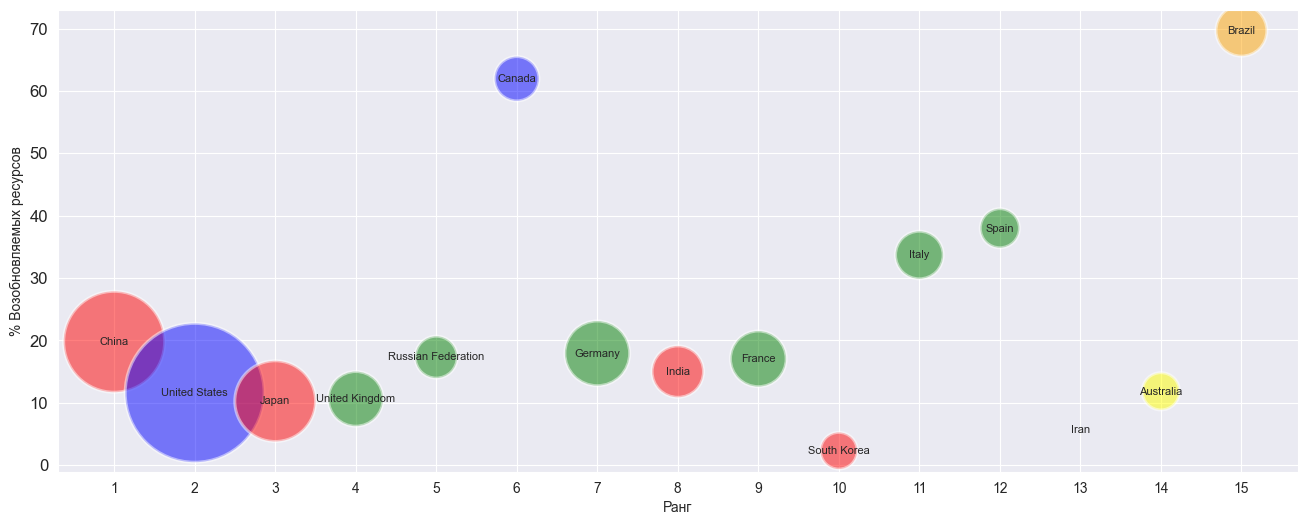

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

country_colors = {
    'China': 'red', 
    'Japan': 'red',  
    'India': 'red', 
    'South Korea': 'red',  
    'Iran': 'red',  
    'United States': 'blue', 
    'Canada': 'blue',  
    'United Kingdom': 'green', 
    'Russian Federation': 'green',  
    'Germany': 'green', 
    'France': 'green', 
    'Italy': 'green', 
    'Spain': 'green',  
    'Brazil': 'orange',  
    'Australia': 'yellow' 
}

bubble = sns.scatterplot(x='Rank', y='% Renewable', size='2015', data=merged, sizes=(700, 10000), legend=False, hue=merged['Country'], palette=country_colors, alpha=0.5)
plt.legend([], [], frameon=False)

plt.xlabel('Ранг')  
plt.ylabel('% Возобновляемых ресурсов') 
plt.xticks(range(1, 16, 1))
plt.yticks(fontsize=12) 

for i in range(len(merged)):
    plt.text(merged['Rank'][i], merged['% Renewable'][i], merged['Country'][i], ha='center', va='center', fontsize=8)

plt.show()

# Висновок
Ця лабораторна робота була спрямована на глибоке вивчення можливостей бібліотеки Pandas для об'єднання датафреймів, агрегування даних та їх візуалізації. Метою було освоїти методи Pandas для обробки даних без використання спискових включень та інших методів ітерації.

Виконуючи завдання 1-14, активно застосовувалися методи злиття датафреймів, агрегування, а також атрибути loc, iloc та слайсингу. Це дозволило ефективно обробляти та аналізувати набори даних.

Результати дослідження свідчать про велику потужність та гнучкість бібліотеки Pandas, відкриваючи нові можливості для подальшого аналізу даних.

Вивчення цих методів є важливими навичками для подальших досліджень та розвитку в сфері аналізу даних.